In [2]:
import sys
sys.path.append('..')
import numpy as np 
import sklearn as sk
import matplotlib.pyplot as plt
from random import shuffle
import sklearn.tree
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from utils import calc_accuracy
from scipy import stats


In [3]:
#import the data into test and train data for the wine dataset
test_data = np.array(np.genfromtxt('C:\\Users\\mukan\\Documents\\GitHub\\Ml-Project\\DATA\\winequality-red-test.csv', delimiter=",",  skip_header=1))
train_data = np.array(np.genfromtxt('C:\\Users\\mukan\\Documents\\GitHub\\Ml-Project\\DATA\\winequality-red-train.csv', delimiter=",",  skip_header=1))
print(train_data.shape)
print(train_data)
print()
print(test_data.shape)
print(test_data)

(1279, 13)
[[3.410e+02 1.060e+01 4.200e-01 ... 8.700e-01 1.130e+01 6.000e+00]
 [1.372e+03 8.700e+00 7.800e-01 ... 1.170e+00 9.200e+00 5.000e+00]
 [4.680e+02 1.140e+01 3.600e-01 ... 6.200e-01 9.200e+00 6.000e+00]
 ...
 [1.090e+02 8.100e+00 7.850e-01 ... 6.900e-01 9.300e+00 5.000e+00]
 [1.160e+02 8.300e+00 5.400e-01 ... 6.100e-01 1.000e+01 6.000e+00]
 [2.930e+02 6.900e+00 3.600e-01 ... 6.000e-01 1.010e+01 6.000e+00]]

(710, 13)
[[0.000e+00 7.400e+00 7.000e-01 ... 5.600e-01 9.400e+00 5.000e+00]
 [2.000e+00 7.800e+00 7.600e-01 ... 6.500e-01 9.800e+00 5.000e+00]
 [4.000e+00 7.400e+00 7.000e-01 ... 5.600e-01 9.400e+00 5.000e+00]
 ...
 [1.590e+03 6.300e+00 5.500e-01 ... 8.200e-01 1.160e+01 6.000e+00]
 [1.591e+03 5.400e+00 7.400e-01 ... 5.600e-01 1.160e+01 6.000e+00]
 [1.598e+03 6.000e+00 3.100e-01 ... 6.600e-01 1.100e+01 6.000e+00]]


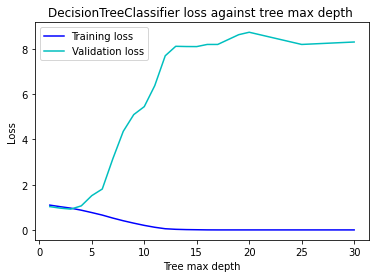

In [6]:
#training of the DecisionTreeClassifier
train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

range_max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]

train_loss =[]
val_loss = []
for i in range_max_depth:
    classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=i)

    classificationTree.fit(X_train, Y_train)
    #Z_train = classificationTree.predict(X_train)
    Z_train_loss = classificationTree.predict_proba(X_train)
    loss_train = log_loss(Y_train, Z_train_loss)
    train_loss.append(loss_train)

    #Z_val = classificationTree.predict(X_val)
    Z_val_loss = classificationTree.predict_proba(X_val)
    loss_val = log_loss(Y_val, Z_val_loss)
    val_loss.append(loss_val)

title = 'DecisionTreeClassifier loss against tree max depth ' 
 
plt.title(title)
plt.plot(range_max_depth, train_loss,   c='b', label='Training loss')
plt.plot(range_max_depth, val_loss,  c='c', label='Validation loss')
plt.xlabel('Tree max depth')
plt.ylabel('Loss')
plt.legend()
plt.show()





In [7]:
# test the model model with the depth chosen from above experiment
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=4)

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))


Loss for the training dataset
0.8722237186626345
Accuracy for the training dataset
0.6308654848800834
Minimum Real value and after prediction
3.0
4.0
Maximum Real value and after prediction
8.0
7.0
Loss for the testing dataset
1.8092817365965619
Accuracy for the testing dataset
0.5676056338028169
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
7.0


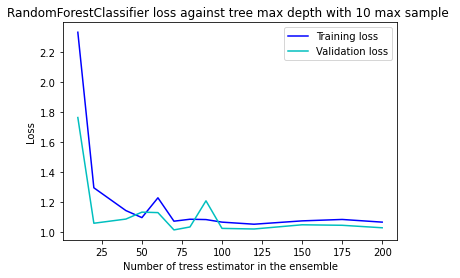

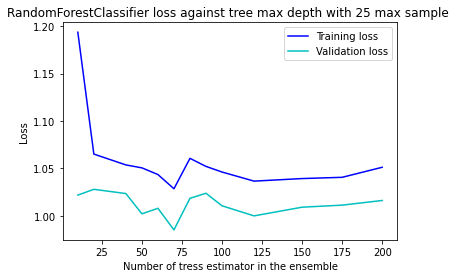

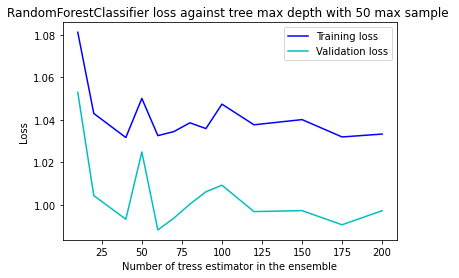

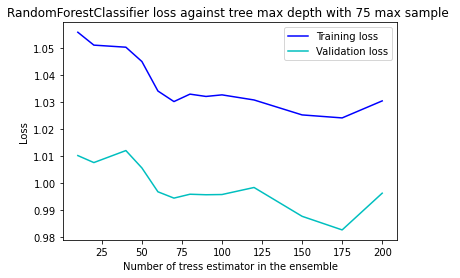

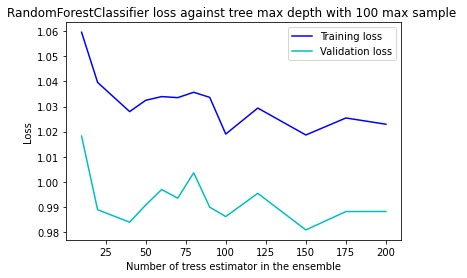

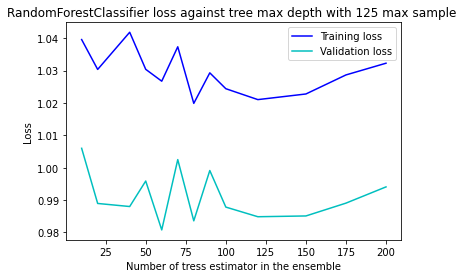

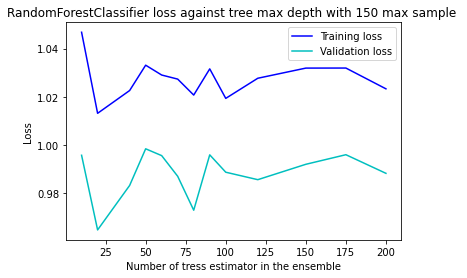

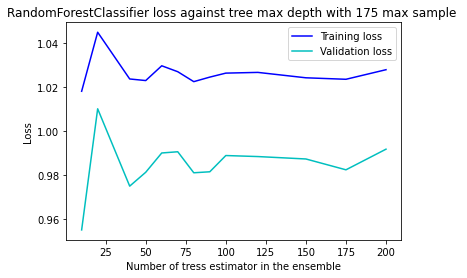

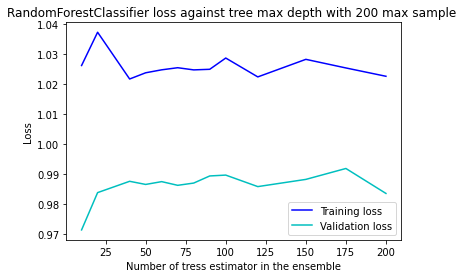

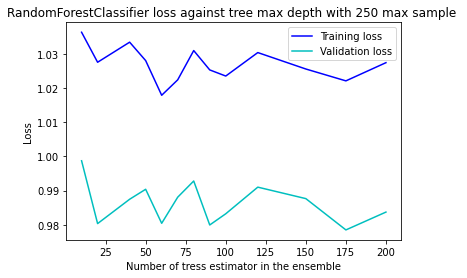

In [8]:
#training of the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

range_n_estimator = [10, 20, 40, 50, 60, 70, 80, 90, 100, 120, 150, 175, 200]
range_max_sample = [10, 25, 50, 75, 100, 125, 150, 175, 200, 250]

for j in range_max_sample:
    train_loss =[]
    val_loss = []
    for i in range_n_estimator:
        classificationTree = RandomForestClassifier(n_estimators=i, max_depth=2, max_samples=j)

        classificationTree.fit(X_train, Y_train)
        #Z_train = classificationTree.predict(X_train)
        Z_train_loss = classificationTree.predict_proba(X_train)
        loss_train = log_loss(Y_train, Z_train_loss)
        train_loss.append(loss_train)

        #Z_val = classificationTree.predict(X_val)
        Z_val_loss = classificationTree.predict_proba(X_val)
        loss_val = log_loss(Y_val, Z_val_loss)
        val_loss.append(loss_val)

    title = 'RandomForestClassifier loss against tree max depth with ' + str(j) + " max sample " 
    
    plt.title(title)
    plt.plot(range_n_estimator, train_loss,   c='b', label='Training loss')
    plt.plot(range_n_estimator, val_loss,  c='c', label='Validation loss')
    plt.xlabel('Number of tress estimator in the ensemble')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()





In [9]:
# test the model model with the depth chosen from above experiment
classificationTree = RandomForestClassifier(n_estimators=50, max_depth=2, max_samples=175)

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))

Loss for the training dataset
1.0374214026151558
Accuracy for the training dataset
0.5693430656934306
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
6.0
Loss for the testing dataset
1.0361032877237897
Accuracy for the testing dataset
0.6098591549295774
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
6.0


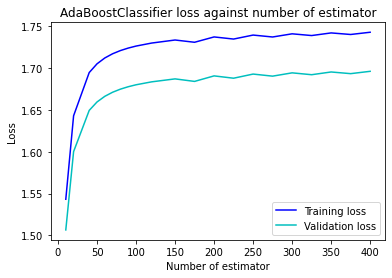

In [10]:
#training of the AdaBoostClassifier
from sklearn.ensemble import  AdaBoostClassifier

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

range_n_estimator = [10, 20, 40, 50, 60, 70, 80, 90, 100, 120, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]

train_loss =[]
val_loss = []
for i in range_n_estimator:
    classificationTree = AdaBoostClassifier(n_estimators=i)
    
    classificationTree.fit(X_train, Y_train)
    #Z_train = classificationTree.predict(X_train)
    Z_train_loss = classificationTree.predict_proba(X_train)
    loss_train = log_loss(Y_train, Z_train_loss)
    train_loss.append(loss_train)

    #Z_val = classificationTree.predict(X_val)
    Z_val_loss = classificationTree.predict_proba(X_val)
    loss_val = log_loss(Y_val, Z_val_loss)
    val_loss.append(loss_val)

title = 'AdaBoostClassifier loss against number of estimator' 
 
plt.title(title)
plt.plot(range_n_estimator, train_loss,   c='b', label='Training loss')
plt.plot(range_n_estimator, val_loss,  c='c', label='Validation loss')
plt.xlabel('Number of estimator')
plt.ylabel('Loss')
plt.legend()
plt.show()





In [11]:
# test the model model with the depth chosen from above experiment
classificationTree = AdaBoostClassifier(n_estimators=50)

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))

Loss for the training dataset
1.7051749619179415
Accuracy for the training dataset
0.5338894681960376
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
8.0
Loss for the testing dataset
1.702901914205172
Accuracy for the testing dataset
0.5338028169014084
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
8.0


In [11]:
#training of the SVM classifier
from sklearn.svm import SVC

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

range_c= [0.01, 0.1, 1, 10, 100, 1000]
## kernel='rbf'
train_loss =[]
val_loss = []
for i in range_c:
    classificationTree = SVC(kernel='linear', C=i, probability=True)

    classificationTree.fit(X_train, Y_train)
    #Z_train = classificationTree.predict(X_train)
    Z_train_loss = classificationTree.predict_proba(X_train)
    loss_train = log_loss(Y_train, Z_train_loss)
    train_loss.append(loss_train)

    #Z_val = classificationTree.predict(X_val)
    Z_val_loss = classificationTree.predict_proba(X_val)
    loss_val = log_loss(Y_val, Z_val_loss)
    val_loss.append(loss_val)
    print("Finished training with C equal to " + str(i))

title = 'SVM loss against C constant' 
 
plt.title(title)
plt.plot(range_c, train_loss,   c='b', label='Training loss')
plt.plot(range_c, val_loss,  c='c', label='Validation loss')
plt.xlabel('Constant C')
plt.ylabel('Loss')
plt.legend()
plt.show()

Finished training with C equal to 0.01
Finished training with C equal to 0.1
Finished training with C equal to 1


In [ ]:
# test the model model with the depth chosen from above experiment
classificationTree = sklearn.svm.SVC(kernel='linear', C=0.01, probability=True)

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))

In [32]:
#training the ensemble of the various model

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

list_of_models =[]
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=3)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=4)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=5)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=6)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=7)
list_of_models.append(classificationTree)
classificationTree = RandomForestClassifier(n_estimators=50, max_depth=2, max_samples=175)
list_of_models.append(classificationTree)
classificationTree = RandomForestClassifier(n_estimators=75, max_depth=2, max_samples=200)
list_of_models.append(classificationTree)
classificationTree = RandomForestClassifier(n_estimators=50, max_depth=2, max_samples=250)
list_of_models.append(classificationTree)
classificationTree = RandomForestClassifier(n_estimators=100, max_depth=2, max_samples=250)
list_of_models.append(classificationTree)
classificationTree = AdaBoostClassifier(n_estimators=10)
list_of_models.append(classificationTree)
classificationTree = AdaBoostClassifier(n_estimators=20)
list_of_models.append(classificationTree)
classificationTree = AdaBoostClassifier(n_estimators=50)
list_of_models.append(classificationTree)
classificationTree = AdaBoostClassifier(n_estimators=75)
list_of_models.append(classificationTree)
classificationTree = AdaBoostClassifier(n_estimators=100)
list_of_models.append(classificationTree)

trained_models =[]
training_predictions = np.zeros((len(Y_train), len(list_of_models))) 

for class_idx, classificationTree in enumerate(list_of_models):

        trained_models.append(classificationTree.fit(X_train, Y_train))
        Z_train = classificationTree.predict(X_train)
        training_predictions[:, class_idx] = Z_train
        print(f'Training accuracy: {calc_accuracy(Z_train, Y_train)}')


final_training_prediction = stats.mode(training_predictions, axis=1)


training_accuracy = calc_accuracy(final_training_prediction, Y_train )

print(f'Ensemble Training accuracy: {training_accuracy}')

Training accuracy: 57.247132429614176
Training accuracy: 62.46089676746611
Training accuracy: 66.42335766423358
Training accuracy: 71.32429614181439
Training accuracy: 76.01668404588112
Training accuracy: 57.35140771637121
Training accuracy: 57.872784150156406
Training accuracy: 57.76850886339937
Training accuracy: 58.28988529718456
Training accuracy: 54.64025026068822
Training accuracy: 54.64025026068822
Training accuracy: 54.64025026068822
Training accuracy: 54.64025026068822
Training accuracy: 54.64025026068822
Ensemble Training accuracy: 20.455353541064785


In [33]:
# testing the ensemble of various models

testing_predictions = np.zeros((len(Y_test), len(list_of_models)))
for class_idx, classificationTree in enumerate(trained_models):
          
    Z_test = classificationTree.predict(X_test)
    testing_predictions[:, class_idx] = Z_test
    print(f'testing accuracy: {calc_accuracy(Z_test, Y_test)}')



final_testing_prediction = stats.mode(testing_predictions, axis=1)


testing_accuracy = calc_accuracy(final_testing_prediction, Y_test )

print(f'Ensemble Testing accuracy: {testing_accuracy}')



testing accuracy: 55.07042253521127
testing accuracy: 54.3661971830986
testing accuracy: 57.32394366197183
testing accuracy: 55.91549295774648
testing accuracy: 56.056338028169016
testing accuracy: 60.56338028169014
testing accuracy: 59.57746478873239
testing accuracy: 60.84507042253521
testing accuracy: 59.57746478873239
testing accuracy: 55.21126760563381
testing accuracy: 55.21126760563381
testing accuracy: 55.21126760563381
testing accuracy: 55.21126760563381
testing accuracy: 55.21126760563381
Ensemble Testing accuracy: 20.771275540567345
